# UAS Computer Vision, Juli 2022

##  <font color="green"> Ini adalah sebagian dari soal UAS. Sebagian yang lain sudah dikerjakan di atas kertas di kampus.</font>


## Pertama-tama, ganti NIM di nama file ini. Klik <font color="red">File -> Rename... </font>

Lalu isi yang di bawah ini. Untuk mengedit cell ini, double-click di sini.
### NAMA: ....
### NIM: ...

In [1]:
from time import ctime
from os import getcwd
import sys
nama = "Luthfi Kamaluddin Tito"        ## Ganti dengan namamu
NIM = "A710190067"        ## Ganti dengan NIM-mu
kota = "Surakarta"        ## Ganti dengan kotamu
print("NAMA:", nama)
print("NIM :", NIM)
print("Kota:", kota)
print(ctime())
print("")
print(getcwd())
print(sys.executable)
print(sys.version)

NAMA: Luthfi Kamaluddin Tito
NIM : A710190067
Kota: Surakarta
Fri Jul 15 16:55:49 2022

C:\Users\asus\computer vision
C:\Users\asus\AppData\Local\Programs\Python\Python310\python.exe
3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)]


##  Importing the libraries

Juga, kamu wajib setuju dengan syarat dan kondisi di bawah.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, Markdown

cond = "Jika ada tanda-tanda kecurangan, semisal kemiripan jawaban antar mahasiswa di suatu pertanyaan, \
maka hal itu dapat mengakibatkan nilai NOL di SEMUA pertanyaan (tidak peduli siapa yang aslinya mengerjakan). \
Jadi, buat jawabanmu lengkap (sehingga unik dan tidak mirip) dengan memberi comments yang cukup dan jangan \
dibagikan lewat cara apapun."
setuju = "Saya, " + nama.upper() + ", dengan ini bersaksi bahwa saya mengerjakan ujian ini tanpa interaksi \
dengan mahasiswa lain atau orang lain dan saya setuju dengan kondisi yang tertuang di atas."

Markdown('<br><font size="4">{}</font><br><br><font size="5">{}</font>'.format(cond, setuju) )

<br><font size="4">Jika ada tanda-tanda kecurangan, semisal kemiripan jawaban antar mahasiswa di suatu pertanyaan, maka hal itu dapat mengakibatkan nilai NOL di SEMUA pertanyaan (tidak peduli siapa yang aslinya mengerjakan). Jadi, buat jawabanmu lengkap (sehingga unik dan tidak mirip) dengan memberi comments yang cukup dan jangan dibagikan lewat cara apapun.</font><br><br><font size="5">Saya, LUTHFI KAMALUDDIN TITO, dengan ini bersaksi bahwa saya mengerjakan ujian ini tanpa interaksi dengan mahasiswa lain atau orang lain dan saya setuju dengan kondisi yang tertuang di atas.</font>

In [3]:
Markdown('<br><br><br><br><div align="center"><font size="7">{}</font></div><br><br>'.format(chr(65021) ) )

<br><br><br><br><div align="center"><font size="7">﷽</font></div><br><br>

# 1 

Buka gambar `student_green.png`. Memakai OpenCV, hilangkan latar hijaunya. **Semua perintah harus diberi komentar yang menjelaskan.** 

Tampilkan berdampingan dengan gambar aslinya.


In [5]:
#Install library OpenCV
import cv2

#Membaca gambar
img = cv2.imread('student_green.png')
#Menampilkan gambar
cv2.imshow('student_green',img)
#Menyimpan gambar
cv2.imwrite('student_green.png',img)

#Menunda windows terdestroy
cv2.waitKey(0)
#Mendestroy windows
cv2.destroyAllWindows()

In [8]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('student_green.png')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
 
 
cv2.imshow('image',img)
cv2.imwrite('student_green.png',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 2

Buat histogram (3 channel) untuk gambar asli dan gambar yang sudah dihilangkan latar belakangnya. Tampilkan berdampingan

Apa perbedaan yang mencolok? Mengapa begitu?

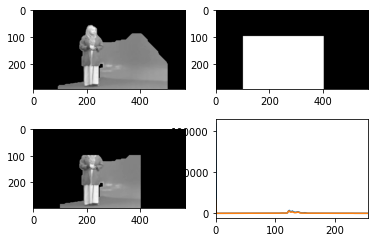

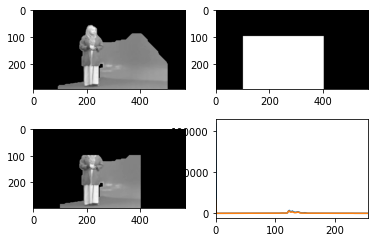

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('student_green.png',0)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('student_green.png',0)
 
# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
 
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
 
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
 
plt.show()

# 3 

Memakai OpenCV, ganti latar belakang yang tadinya hijau dengan gambar `pantai.jpg`. Sesuaikan ukurannya agar tampak bagus. Semua proses harus memakai OpenCV / numpy. **Semua perintah harus diberi komentar yang menjelaskan.**


Tampilkan berdampingan dengan gambar aslinya.

# 4

Buat histogram (3 channel) untuk gambar asli, gambar yang sudah dihilangkan latar belakangnya, serta gambar yang sudah berlatar pantai. Tampilkan ketiganya berdampingan

Apa perbedaan yang mencolok? Mengapa begitu?

## Click Kernel  -->  Restart & Run All

## Save

## Add, commit, then push to GitHub